# Szerencsejáték Zrt.

## 1. feladat - A lottózó
Egy lottózóban dolgozunk. A szomszédos kocsmából érkezik Sanyi bácsi hozzánk, aki már nem szomjas, és a memóriája sem a régi, viszont nagyon szeretne ötös lottót játszani.

Sanyi bácsi nincs igazában tisztában a lottózás szabályaival, így először vegyük őket át közösen:
1. Öt számot kell választani, se többet, se kevesebbet
2. Számokat 1-99 között választhatunk. 
3. Két egyforma számot nem választhatunk az ötös listánkban.

Sanyi bácsi a programunkba fogja beütni az öt számot egyesével. A programunknak addig kell futnia, amíg Sanyi bácsi meg nem adta mind az öt számot helyesen!

Néhány dolgot az elején szögezzünk le:
1. Nem tudjuk előre megmondani, hogy hányszor fog Sanyi bácsi hibázni.
2. Rendszeresen mellé fog ütni.
3. Az olvasás azért még nagyjából megy neki.

Az első probléma rögtön kézenfekvővé teszi: **while ciklust fogunk használni**, hiszen nem tudjuk, hány próbálkozásra sikerül Sanyi bácsinak megadnia a számokat.

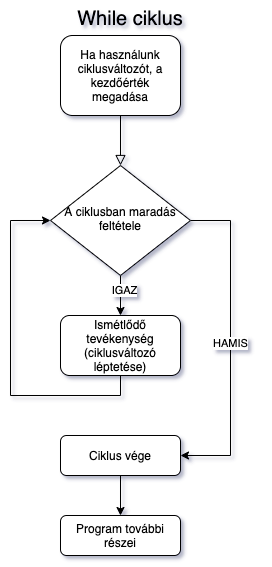

A legegyszerűbb az, hogyha a számait rögzítjük egy listában, és a lista hosszából tudni fogjuk a próbálkozásait. Legyen ez az alap feltételünk, és rögzítsük Sanyi bácsi számait!

In [3]:
szamok = []

while(len(szamok) < 5):
    szam = int(input("Kérem adja meg a következő nyerőszámát: "))
    szamok.append(szam)

print("Az ön által megrakott számok:")
print(szamok)

Kérem adja meg a következő nyerőszámát:  10
Kérem adja meg a következő nyerőszámát:  200
Kérem adja meg a következő nyerőszámát:  30
Kérem adja meg a következő nyerőszámát:  40
Kérem adja meg a következő nyerőszámát:  40


Az ön által megrakott számok:
[10, 200, 30, 40, 40]


Látható, hogy programunk még nem tudja olyan jól kezelni Sanyi bácsi véralkoholszintjét. Ezekhez írjunk feltételeket, és csak akkor adjuk hozzá a következő elemet a választott számokhoz, ha a feltételek megfelelően teljesülnek. Máskülönben részletesen jelezzük, hogy mi volt a probléma a megadott számmal!

In [4]:
szamok = []

while(len(szamok) < 5):
    szam = int(input("Kérem adja meg a következő nyerőszámát: "))
    if szam < 1 or szam > 99:
        print("A nyerőszámoknak 1 és 99 közé kell esni!")
    elif szam in szamok:
        print("A nyerőszámok között nem választhat két egyformát! Ezt a számot már választotta!")
    else:
        szamok.append(szam)

print("Az ön által megrakott számok:")
print(szamok)

Kérem adja meg a következő nyerőszámát:  10
Kérem adja meg a következő nyerőszámát:  100


A nyerőszámoknak 1 és 99 közé kell esni!


Kérem adja meg a következő nyerőszámát:  20
Kérem adja meg a következő nyerőszámát:  30
Kérem adja meg a következő nyerőszámát:  40
Kérem adja meg a következő nyerőszámát:  40


A nyerőszámok között nem választhat két egyformát! Ezt a számot már választotta!


Kérem adja meg a következő nyerőszámát:  50


Az ön által megrakott számok:
[10, 20, 30, 40, 50]


## 2. feladat - A sorsolás
Sajnos Harsányi Leventét és Lolát a SzerencseSzombat élő adásában megrázta a lottósorsoló gép, az pedig elromlott. Azonban a közönség soraiban ült egy programozó, aki jelentkezett is, hogy gyorsan ír egy megbízható sorsolóprogramot!

A sorsolóprogram pont úgy működik, mint egy tét megrakása, csak a gép választ véletlenszerűen.

Sanyi bácsihoz hasonlóan a random modul randint függvénye sem emlékszik az előzőleg húzott számra, de szerencsére a tippeket pontos tartományban adja meg. Így nincs más dolgunk, mint a lottózóban használt algoritmust újra alkalmazni, csak ezúttal gépi generált számokat kell használnunk!

In [7]:
from random import randint
szamok = []

while(len(szamok) < 5):
    szam = randint(1,99)
    if szam < 1 or szam > 99:
        print("A nyerőszámoknak 1 és 99 közé kell esni!")
    elif szam in szamok:
        print("A nyerőszámok között nem választhat két egyformát! Ezt a számot már választotta!")
    else:
        szamok.append(szam)

print("Az ön által megrakott számok:")
print(szamok)

A nyerőszámok között nem választhat két egyformát! Ezt a számot már választotta!
Az ön által megrakott számok:
[80, 47, 61, 79, 81]


A gépnek nincs sok értelme üzenetet visszaadnunk, úgy sem fogja elolvasni. Mi lenne, ha egyszerűsítenénk a feltételeken a korábbi tudásunkat is alkalmazva?

In [13]:
from random import randint
szamok = []

while(len(szamok) < 5):
    szam = randint(1,99)
    feltetelek = [
        szam in szamok,
        1 > szam > 99
    ]
    if any(feltetelek):
        continue
    else:
        szamok.append(szam)

print("Az ön által megrakott számok:")
print(szamok)

Az ön által megrakott számok:
[21, 24, 62, 78, 19]


## 3. feladat - lottóprogram V0
A fentiek alapján el tudjuk készíteni - kis kiegészítéssel a tökéletes lottóprogramot.
Mással nem is kell foglalkoznunk, csak a kézzel és géppel felvitt számok között kell megszámolni, hány találatunk volt? A megszámláláshoz **for** ciklust fogunk használni, mivel pontosan tudjuk, hogy hány elemet kell leellenőrizni, sőt gyakorlatilag egyesével fogjuk ezeket az elemeket leellenőrizni.

In [17]:
from random import randint

szamok = []

while(len(szamok) < 5):
    szam = int(input("Kérem adja meg a következő nyerőszámát: "))
    if szam < 1 or szam > 99:
        print("A nyerőszámoknak 1 és 99 közé kell esni!")
    elif szam in szamok:
        print("A nyerőszámok között nem választhat két egyformát! Ezt a számot már választotta!")
    else:
        szamok.append(szam)

print("Az ön által megrakott számok:")
print(szamok)

huzott_szamok = []

while(len(huzott_szamok) < 5):
    szam = randint(1,99)
    feltetelek = [
        szam in huzott_szamok,
        1 > szam > 99
    ]
    if any(feltetelek):
        continue
    else:
        huzott_szamok.append(szam)

print("A nyerő számok: ")
print(huzott_szamok)
talalatok = 0        
        
    
for sz in szamok:
    if sz in huzott_szamok:
        talalatok += 1
        print(f"Talált a(z) {sz} szám!")
        
print(f"A találatok száma: {talalatok}")

Kérem adja meg a következő nyerőszámát:  12
Kérem adja meg a következő nyerőszámát:  23
Kérem adja meg a következő nyerőszámát:  45
Kérem adja meg a következő nyerőszámát:  55
Kérem adja meg a következő nyerőszámát:  87


Az ön által megrakott számok:
[12, 23, 45, 55, 87]
A nyerő számok: 
[87, 89, 68, 57, 50]
Talált a(z) 87 szám!
A találatok száma: 1
